In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import path

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [21]:
data = []

with open('News_Category_Dataset.json') as f:
    for line in f:
        json_dict = json.loads(line)
        current_line = [json_dict['category'], 
                        json_dict['headline'], 
                        json_dict['short_description'], 
                        json_dict['link'],
                        json_dict['date']]
        data.append(current_line)

df = pd.DataFrame(data, columns = ['category', 'headline', 'short_description', 'link', 'date']) 

In [22]:
categories, categorical_data = df['category'].unique().tolist(), dict()

for category in categories:
    categorical_data["df_{}".format(category.lower().replace(" ", ""))] = df[(df['category'] == category)]
    
categorical_data.keys()

dict_keys(['df_crime', 'df_entertainment', 'df_worldnews', 'df_impact', 'df_politics', 'df_weirdnews', 'df_blackvoices', 'df_women', 'df_comedy', 'df_queervoices', 'df_sports', 'df_business', 'df_travel', 'df_media', 'df_tech', 'df_religion', 'df_science', 'df_latinovoices', 'df_education', 'df_college', 'df_parents', 'df_arts&culture', 'df_style', 'df_green', 'df_taste', 'df_healthyliving', 'df_theworldpost', 'df_goodnews', 'df_worldpost', 'df_fifty', 'df_arts', 'df_wellness', 'df_parenting', 'df_home&living', 'df_style&beauty', 'df_divorce', 'df_weddings', 'df_food&drink', 'df_money', 'df_environment', 'df_culture&arts'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 5 columns):
category             200853 non-null object
headline             200853 non-null object
short_description    200853 non-null object
link                 200853 non-null object
date                 200853 non-null object
dtypes: object(5)
memory usage: 7.7+ MB


In [24]:
df.describe()

,category,headline,short_description,link,date
count,200853,200853,200853,200853,200853
unique,41,199344,178353,200812,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://blogs.wsj...,2012-12-07
freq,32739,90,19712,2,100


In [25]:
df.isnull().sum()

category             0
headline             0
short_description    0
link                 0
date                 0
dtype: int64

Text(0, 0.5, 'Number of Articles')

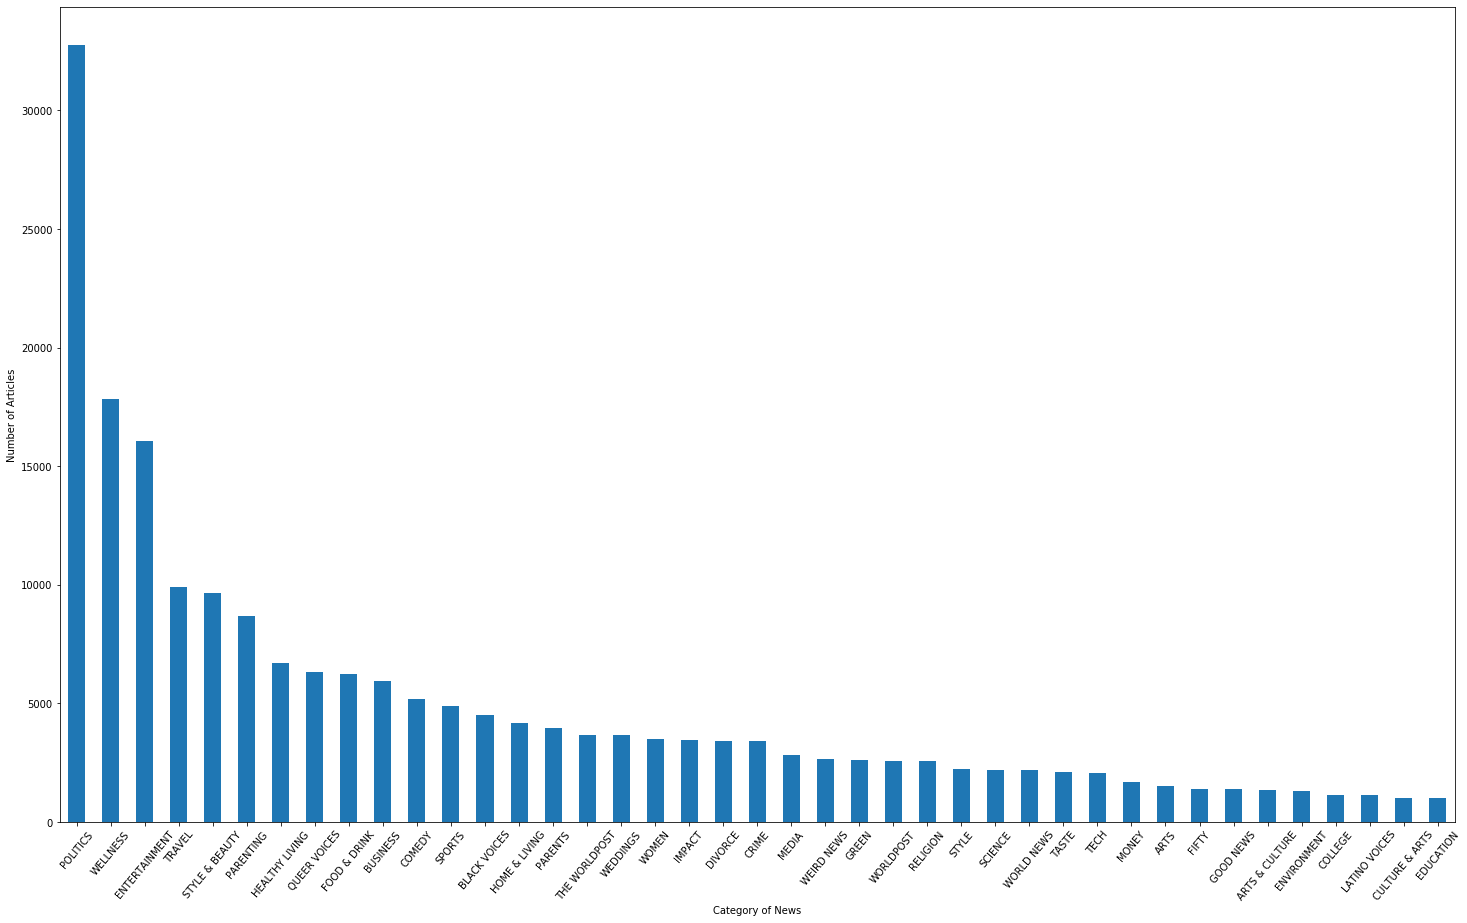

In [33]:
plt.figure(figsize=(25,15))
df['category'].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category of News")
plt.ylabel("Number of Articles")

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords

In [42]:
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2), stop_words = stopwords.words('english'))
cvector.fit(df['headline'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

796985